### Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import json
import numpy as np
import random
import math

import os

from pprint import pprint
from collections import Counter
from matplotlib.ticker import MaxNLocator
from itertools import tee



from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

from trefle.fitness_functions.output_thresholder import round_to_cls
from trefle.trefle_classifier import TrefleClassifier

from trefle_engine import TrefleFIS

import libraries.measures_calculation
import libraries.trefle_project
import libraries.interpretability_methods
import libraries.interpretability_plots
import libraries.results_plot
from libraries.model_var import ModelVar
from libraries.model_train_cv import *

### View the data

In [2]:
DATA_PATH = './data/sig_genes_all.csv'
TEST_DATA = './data/test_data.csv'
TRAIN_DATA = './data/train_data.csv'

In [3]:

sig_genes_df = pd.read_csv(DATA_PATH)
sig_genes_df

,ID_REF,222549_at,225806_at,212942_s_at,230875_s_at,204700_x_at,201479_at,209434_s_at,218252_at,212160_at,...,209763_at,209791_at,213030_s_at,219722_s_at,1554691_a_at,211848_s_at,210301_at,241910_x_at,207251_at,label
0,GSM537330,11.182047,8.654008,11.595814,10.788859,9.970058,13.265159,10.309465,10.792290,10.979091,...,4.385059,7.163497,6.133836,6.409017,6.471690,5.407070,5.771060,6.579976,4.020783,1
1,GSM537331,12.058899,8.570928,8.078051,10.841658,8.926295,12.315495,8.541125,10.285925,10.301478,...,4.608451,7.179011,7.209485,6.449632,6.180759,5.519772,5.899706,6.402626,4.200474,1
2,GSM537332,12.207601,8.881271,12.003163,11.154477,9.328660,12.539403,9.705434,10.145887,10.975288,...,4.159438,7.990475,7.373144,8.832812,6.113780,5.249316,5.638621,6.233673,4.106327,1
3,GSM537333,10.107762,9.669961,11.520907,9.931038,8.992218,12.541827,9.969553,9.541109,11.045446,...,4.548334,9.561014,6.443398,5.710410,6.459584,5.136546,5.580787,6.154057,4.047665,1
4,GSM537334,11.833478,8.543258,9.102151,10.329359,9.553853,12.255601,9.499729,10.198663,11.004912,...,4.409520,7.440874,5.652310,6.246096,6.404187,6.214226,5.731560,6.186047,4.234885,1
5,GSM537335,12.059512,9.114891,9.414645,11.481841,9.314749,12.508543,10.099204,11.132652,11.250412,...,4.539116,6.781417,6.264597,7.092256,5.785716,5.065627,5.445177,6.685326,4.421340,1
6,GSM537336,7.525914,8.076111,12.369972,10.061145,7.938799,11.938807,9.617497,8.953277,10.841424,...,3.801822,8.502481,6.869098,8.307073,7.160047,4.618499,5.836587,6.101565,4.248786,1
7,GSM537337,10.954483,8.840053,9.808922,10.429094,8.758957,12.684168,9.050508,10.164506,10.547668,...,4.960248,8.517112,6.526639,6.837989,6.495719,8.847287,5.687328,5.990007,4.135739,1
8,GSM537338,12.306071,8.421929,8.836539,10.652797,8.953626,12.705771,9.639117,10.427685,10.647170,...,4.966710,6.989520,7.015799,6.365625,6.524275,6.739127,5.806423,6.088321,4.317009,1
9,GSM537339,10.414325,8.881041,10.666415,10.564276,8.987484,11.577449,9.424550,10.801880,10.977630,...,4.376122,9.143720,7.166073,6.862989,7.013994,5.100299,5.561997,5.685538,5.377095,1


### Extract data (X) and labels (y)  
And split into train and test sets

In [4]:
X = sig_genes_df.iloc[:, 1:-1]
y = sig_genes_df.iloc[:,-1]

In [5]:
# split into train and test sets 
# eventually change the test_size
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, stratify=y, random_state=42, test_size=0.33)

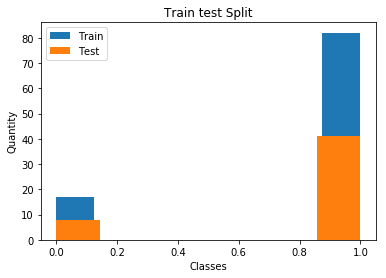

In [6]:
plt.hist(y_train, bins='auto', label='Train')

plt.hist(y_test, bins='auto', label='Test')
plt.title("Train test Split")
plt.xlabel('Classes')
plt.ylabel('Quantity')
plt.legend()
plt.show()

In [7]:
y_train_modify = np.reshape(y_train, (-1, 1))
train_dataset = np.append(X_train, y_train_modify, axis=1)

y_test_modify = np.reshape(y_test, (-1, 1))
test_dataset = np.append(X_test, y_test_modify, axis=1)

np.savetxt(TRAIN_DATA, train_dataset, delimiter=",")
np.savetxt(TEST_DATA, test_dataset, delimiter=",")

In [8]:
clf = TrefleClassifier(
    n_rules=4,
    n_classes_per_cons=[2],  # there is only 1 consequent with 2 classes
    n_labels_per_mf=3,  # use 3 labels LOW, MEDIUM, HIGH
    default_cons=[0],  # default rule yield the class 0
    n_max_vars_per_rule=3,  # WBCD dataset has 30 variables, here we force
    # to use a maximum of 3 variables per rule
    # to have a better interpretability
    # In total we can have up to 3*4=12 different variables
    # for a fuzzy system
    
    #Change here the number of generations (if necessary)
    n_generations=250,
    verbose=False,
)

In [9]:
# Create folders for experiences
# Create target Directory if don't exist
if not os.path.exists('experiences/'):
    os.mkdir('experiences/')
    os.mkdir('experiences/sen_spe/')
    os.mkdir('experiences/rmse_v2/')
    os.mkdir('experiences/n_rules/')
    os.mkdir('experiences/n_rules_nvar/')
    os.mkdir('experiences/n_rules_nvar_tuning/')
    os.mkdir('experiences/all_models/')



In [10]:
%load_ext autoreload
%autoreload
global weigh_senSpe


##############fitness function (No change required)
def fit (y_true, y_pred):
    global weigh_senSpe
    
    y_pred_bin = round_to_cls(y_pred, n_classes=2)
    tn, fp, fn, tp = libraries.trefle_project.getConfusionMatrixValues(y_true, y_pred_bin)
    
    
    sensitivity = libraries.measures_calculation.calculateSensitivity(tn, fp, fn, tp)
    specificity = libraries.measures_calculation.calculateSpecificity(tn, fp, fn, tp)
    #rmse = mean_squared_error(y_true, y_pred)
    score = weigh_senSpe * sensitivity + (1.0 - weigh_senSpe) * specificity
    return score

clf.fitness_function=fit
###############


#Perform Cross-validation
#Change here the number of folds (if necessary)
k_fold_number = 5
cv_kf = KFold(n_splits=k_fold_number, random_state=42, shuffle=True)
array_index_train_test = cv_kf.split(X_train)
array_index_train_test, array_index_train_test_copy = tee(array_index_train_test)


#--------------------
path_save_results_directory = 'experiences/sen_spe/'
#file nam that will contain the results for each model create (so fo each fold)
file_results_dv = 'values_sen_spe_weight.csv'
#Name of the experience, this name will appear on the models files
experience_value_name = 'exps_lab_lfa_senSpe_2'
#--------------------

model_train_obj = ModelTrain(array_index_train_test = array_index_train_test,
                             X_train = X_train,
                             y_train = y_train, 
                             number_rule = 0, var_per_rule = 0, 
                             classifier_trefle = clf, 
                             path_save_results = path_save_results_directory,
                            path_save_results_values=file_results_dv,
                            experience_name = experience_value_name)


#Here we can choose which values for the number of rules and maximum variables per 
#rule we want to test along our experience ('here you need to change and explain your choice, on the report')
vec_weight = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

#For the moment we use these values for the number of rules and vars per rule
number_rule = 5
var_per_rule = 5

for weight_actual in vec_weight:
    model_train_obj.number_rule = number_rule
    model_train_obj.var_per_rule = var_per_rule
    model_train_obj.weight_actual = weight_actual
    weigh_senSpe = weight_actual
    model_train_obj.execute_cv()

save end
save end
save end
save end
save end
(5, 7)
(5, 1)
[[ 5.  5.  0.  5.  0. 15.  0.]
 [ 5.  5.  1.  2.  0. 18.  0.]
 [ 5.  5.  2.  1.  1. 14.  4.]
 [ 5.  5.  3.  4.  0. 16.  0.]
 [ 5.  5.  4.  4.  0. 15.  0.]]
[['experiences/sen_spe/exps_lab_lfa_senSpe_2_conf_A_CV_0_rule_5_var_per_rule_5.ftt']
 ['experiences/sen_spe/exps_lab_lfa_senSpe_2_conf_A_CV_1_rule_5_var_per_rule_5.ftt']
 ['experiences/sen_spe/exps_lab_lfa_senSpe_2_conf_A_CV_2_rule_5_var_per_rule_5.ftt']
 ['experiences/sen_spe/exps_lab_lfa_senSpe_2_conf_A_CV_3_rule_5_var_per_rule_5.ftt']
 ['experiences/sen_spe/exps_lab_lfa_senSpe_2_conf_A_CV_4_rule_5_var_per_rule_5.ftt']]
save end
save end
save end
save end
save end
(10, 7)
(10, 1)
[[ 5.  5.  0.  5.  0. 15.  0.]
 [ 5.  5.  1.  2.  0. 18.  0.]
 [ 5.  5.  2.  1.  1. 14.  4.]
 [ 5.  5.  3.  4.  0. 16.  0.]
 [ 5.  5.  4.  4.  0. 15.  0.]
 [ 5.  5.  0.  5.  0.  1. 14.]
 [ 5.  5.  1.  2.  0.  0. 18.]
 [ 5.  5.  2.  2.  0.  0. 18.]
 [ 5.  5.  3.  4.  0.  0. 16.]
 [ 5.  5.  4.  4.  

save end
save end
save end
save end
save end
(30, 7)
(30, 1)
[[ 5.  5.  0.  5.  0. 15.  0.]
 [ 5.  5.  1.  2.  0. 18.  0.]
 [ 5.  5.  2.  1.  1. 14.  4.]
 [ 5.  5.  3.  4.  0. 16.  0.]
 [ 5.  5.  4.  4.  0. 15.  0.]
 [ 5.  5.  0.  5.  0.  1. 14.]
 [ 5.  5.  1.  2.  0.  0. 18.]
 [ 5.  5.  2.  2.  0.  0. 18.]
 [ 5.  5.  3.  4.  0.  0. 16.]
 [ 5.  5.  4.  4.  0.  0. 15.]
 [ 5.  5.  0.  5.  0.  0. 15.]
 [ 5.  5.  1.  2.  0.  0. 18.]
 [ 5.  5.  2.  2.  0.  0. 18.]
 [ 5.  5.  3.  4.  0.  0. 16.]
 [ 5.  5.  4.  4.  0.  0. 15.]
 [ 5.  5.  0.  5.  0.  0. 15.]
 [ 5.  5.  1.  2.  0.  0. 18.]
 [ 5.  5.  2.  2.  0.  0. 18.]
 [ 5.  5.  3.  4.  0.  0. 16.]
 [ 5.  5.  4.  4.  0.  0. 15.]
 [ 5.  5.  0.  5.  0.  1. 14.]
 [ 5.  5.  1.  2.  0.  0. 18.]
 [ 5.  5.  2.  2.  0.  0. 18.]
 [ 5.  5.  3.  4.  0.  0. 16.]
 [ 5.  5.  4.  4.  0.  0. 15.]
 [ 5.  5.  0.  4.  1.  0. 15.]
 [ 5.  5.  1.  0.  2.  0. 18.]
 [ 5.  5.  2.  2.  0.  0. 18.]
 [ 5.  5.  3.  4.  0.  0. 16.]
 [ 5.  5.  4.  3.  1.  0. 15.]]
[['exper